In [1]:
import plotly as ply
from datetime import datetime
import cufflinks as cf
import mplfinance as fplt
import pandas as pd
from nselib import capital_market
import matplotlib.pyplot as plt
import numpy as np
import talib as tb
import yfinance as yf
from datetime import date
from matplotlib.widgets import Cursor

In [8]:
class CursorClass(object):
    def __init__(self, ax, x, y):
        self.ax = ax
        self.ly = ax.axvline(color='yellow', alpha=0.5)
        self.marker = ax.plot([0], [0], marker='o', color='r', zorder=3)
        self.x = x
        self.y = y
    def mouse_event(self, event):
        if event.inaxes:
            x, y = event.xdata, event.ydata
            indx = np.searchsorted(self.x,[x])[0]
            x = self.x[indx]
            y = self.y[indx]
            self.ly.set_xdata(x)
            self.marker.set_data([x],[y])
            self.txt.set_text('x=%1.2f, y=%1.2f' % (x, y))
            self.txt.set_position((x, y))
            self.ax.figure.canvas.draw_idle()
        else:
            return


[*********************100%%**********************]  1 of 1 completed


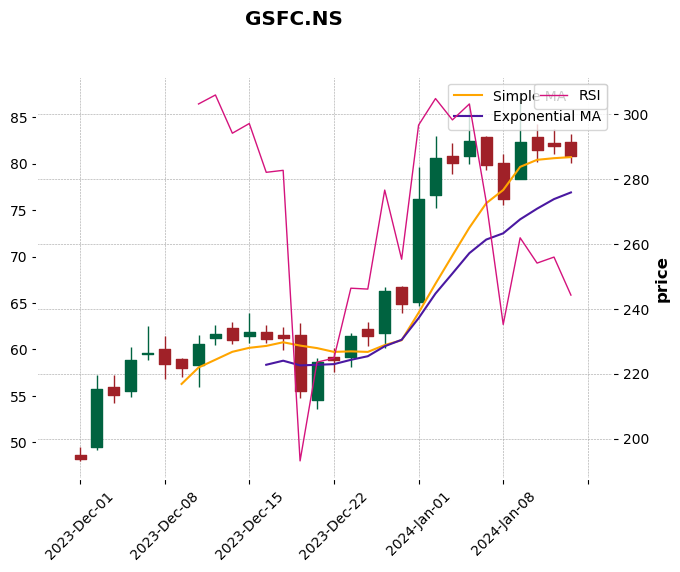

In [7]:
today = date.today()

sym=input("Enter Stock Symbol (NSE listed) : ")
sym = str(sym) + '.NS'
start_date = input("Enter start date (in format yyyy-mm-dd) : ")
stock_data = yf.download(sym, start=start_date, end=today)
stock_df = pd.DataFrame({'Open':stock_data['Open'], 'High':stock_data['High'], 'Low':stock_data['Low'], 'Close':stock_data['Close']})
# print(stock_df)
# print(stock_df.index)

sma_period = 7  # You can adjust the period as needed
stock_df['SMA'] = stock_df['Close'].rolling(window=sma_period).mean()
sma = fplt.make_addplot(stock_df["SMA"], color="orange", width=1.5, label="Simple MA")


stock_df['EMA'] = tb.EMA(stock_df['Close'], timeperiod=12)
ema = fplt.make_addplot(stock_df["EMA"], color="#4A18A1", width=1.5, label="Exponential MA")

stock_df['RSI'] = tb.RSI(stock_df['Close'], timeperiod=7)
rsi = fplt.make_addplot(stock_df['RSI'], color="#D4137D", width=1.0, label="RSI")

# cursor = Cursor( useblit=True, color='red', linewidth=1, linestyle='dashed')


fplt.plot(
    stock_df,
    type='candle',
    addplot = [sma, ema, rsi],
    style='charles',
    title = f"{sym}",
    ylabel = "price",
)
